 # Tutorial
https://github.com/cstub/ml-ids

---


 # Data
 aws s3 sync --no-sign-request --region eu-north-1 "s3://cse-cic-ids2018/" C:\Users\El-Wattaneya

aws s3 sync --no-sign-request --region eu-north-1 "s3://cse-cic-ids2018/Processed Traffic Data for ML Algorithms/" C:\Users\El-Wattaneya


---


your-region = eu-north-1


dest-dir = C:\Users\El-Wattaneya

# 1. Load Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Preprocessing data

In [6]:
# load data
##df = pd.read_csv("/content/drive/MyDrive/ML/Project ML/data/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")
df = pd.read_csv("Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv")
df.head()

/home/hp/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


In [ ]:
# to search about Infinity
df.apply(lambda row: row.astype(str).str.contains('Infinity').any(), axis=1).sum()

In [7]:
# get the counts of cloumn target
df['FIN Flag Cnt'].value_counts()

0               268629
0                60520
1                 1707
1                  244
FIN Flag Cnt        25
Name: FIN Flag Cnt, dtype: int64

In [8]:
df['Label'].value_counts()

Benign           238037
Infilteration     93063
Label                25
Name: Label, dtype: int64

In [9]:
df['Protocol'].value_counts()

6           170066
17           95674
6            42833
17           15378
0             4596
0             2553
Protocol        25
Name: Protocol, dtype: int64

## 2.2 Try to remove the duplication headers

In [10]:
# dimension of dataframe
df.shape

(331125, 80)

**we have 331125 rows before filter the duplicate headers**

In [11]:
df = df[df.Label.str.contains('Label') == False]

df.shape

(331100, 80)

**we have 331100 rows after filter the duplicate headers... almost 25 rows remove**

In [12]:
df['Protocol'].value_counts()

6     170066
17     95674
6      42833
17     15378
0       4596
0       2553
Name: Protocol, dtype: int64

In [13]:
df['Label'].value_counts()

Benign           238037
Infilteration     93063
Name: Label, dtype: int64

## 2.3 Change column data type

- We notice that all column data type is object because it mixed numeric data & Infinity character

In [14]:
# explore the type of data in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331100 entries, 0 to 331111
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Dst Port           331100 non-null  object
 1   Protocol           331100 non-null  object
 2   Timestamp          331100 non-null  object
 3   Flow Duration      331100 non-null  object
 4   Tot Fwd Pkts       331100 non-null  object
 5   Tot Bwd Pkts       331100 non-null  object
 6   TotLen Fwd Pkts    331100 non-null  object
 7   TotLen Bwd Pkts    331100 non-null  object
 8   Fwd Pkt Len Max    331100 non-null  object
 9   Fwd Pkt Len Min    331100 non-null  object
 10  Fwd Pkt Len Mean   331100 non-null  object
 11  Fwd Pkt Len Std    331100 non-null  object
 12  Bwd Pkt Len Max    331100 non-null  object
 13  Bwd Pkt Len Min    331100 non-null  object
 14  Bwd Pkt Len Mean   331100 non-null  object
 15  Bwd Pkt Len Std    331100 non-null  object
 16  Flow Byts/s        3

In [15]:
types = {
    df.columns[0]: 'uint32',
    df.columns[1]: 'uint8',
    df.columns[2]: 'object',
    df.columns[3]: 'int64',
    df.columns[4]: 'uint32',
    df.columns[5]: 'uint32',
    df.columns[6]: 'uint32',
    df.columns[7]: 'uint32',
    df.columns[8]: 'uint16',
    df.columns[9]: 'uint16',
    df.columns[10]: 'float32',
    df.columns[11]: 'float32',
    df.columns[12]: 'uint16',
    df.columns[13]: 'uint16',
    df.columns[14]: 'float32',
    df.columns[15]: 'float32',
    df.columns[16]: 'float64',
    df.columns[17]: 'float64',
    df.columns[18]: 'float32',
    df.columns[19]: 'float32',
    df.columns[20]: 'int64',
    df.columns[21]: 'int64',
    df.columns[22]: 'int64',
    df.columns[23]: 'float32',
    df.columns[24]: 'float32',
    df.columns[25]: 'int64',
    df.columns[26]: 'int64',
    df.columns[27]: 'uint32',
    df.columns[28]: 'float32',
    df.columns[29]: 'float32',
    df.columns[30]: 'uint32',
    df.columns[31]: 'uint32',
    df.columns[32]: 'uint8',
    df.columns[33]: 'uint8',
    df.columns[34]: 'uint8',
    df.columns[35]: 'uint8',
    df.columns[36]: 'uint32',
    df.columns[37]: 'uint32',
    df.columns[38]: 'float32',
    df.columns[39]: 'float32',
    df.columns[40]: 'uint16',
    df.columns[41]: 'uint16',
    df.columns[42]: 'float32',
    df.columns[43]: 'float32',
    df.columns[44]: 'float32',
    df.columns[45]: 'uint8',
    df.columns[46]: 'uint8',
    df.columns[47]: 'uint8',
    df.columns[48]: 'uint8',
    df.columns[49]: 'uint8',
    df.columns[50]: 'uint8',
    df.columns[51]: 'uint8',
    df.columns[52]: 'uint8',
    df.columns[53]: 'uint16',
    df.columns[54]: 'float32',
    df.columns[55]: 'float32',
    df.columns[56]: 'float32',
    df.columns[57]: 'uint8',
    df.columns[58]: 'uint8',
    df.columns[59]: 'uint8',
    df.columns[60]: 'uint8',
    df.columns[61]: 'uint8',
    df.columns[62]: 'uint8',
    df.columns[63]: 'uint32',
    df.columns[64]: 'uint32',
    df.columns[65]: 'uint32',
    df.columns[66]: 'uint32',
    df.columns[67]: 'int32',
    df.columns[68]: 'int32',
    df.columns[69]: 'uint32',
    df.columns[70]: 'uint8',
    df.columns[71]: 'float32',
    df.columns[72]: 'float32',
    df.columns[73]: 'uint32',
    df.columns[74]: 'uint32',
    df.columns[75]: 'float32',
    df.columns[76]: 'float32',
    df.columns[77]: 'uint64',
    df.columns[78]: 'uint64',
    df.columns[79]: 'category'
}

In [16]:
df = df.astype(types)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331100 entries, 0 to 331111
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   Dst Port           331100 non-null  uint32  
 1   Protocol           331100 non-null  uint8   
 2   Timestamp          331100 non-null  object  
 3   Flow Duration      331100 non-null  int64   
 4   Tot Fwd Pkts       331100 non-null  uint32  
 5   Tot Bwd Pkts       331100 non-null  uint32  
 6   TotLen Fwd Pkts    331100 non-null  uint32  
 7   TotLen Bwd Pkts    331100 non-null  uint32  
 8   Fwd Pkt Len Max    331100 non-null  uint16  
 9   Fwd Pkt Len Min    331100 non-null  uint16  
 10  Fwd Pkt Len Mean   331100 non-null  float32 
 11  Fwd Pkt Len Std    331100 non-null  float32 
 12  Bwd Pkt Len Max    331100 non-null  uint16  
 13  Bwd Pkt Len Min    331100 non-null  uint16  
 14  Bwd Pkt Len Mean   331100 non-null  float32 
 15  Bwd Pkt Len Std    331100 non-null

- We notice that when changing data type => "Infinity" converted to "inf" automatically

## 2.4 Try to filter NAN and Infinity values

### Check NA and columns

In [17]:
# check NA 
df.isna().values.any()

# there is NA values

True

In [18]:
# detect the columns with NA
df.columns[df.isnull().any()].tolist()

['Flow Byts/s']

In [19]:
df["Flow Byts/s"].isna().sum()

1834

### Check Infinity and columns

In [20]:
# Infinity convert to inf automatically after change the data type
df.isin(['Infinity']).values.any()

False

In [21]:
# detect the columns with inf
df.columns[df.isin([np.inf, -np.inf]).any()].tolist()

['Flow Byts/s', 'Flow Pkts/s']

In [22]:
df.apply(lambda row: row.astype(str).str.contains('inf').any(), axis=1).sum()

2919

### Replace inf & NAN with the mean of column

In [28]:
inf_columns = df.columns[df.isin([np.inf, -np.inf]).any()].tolist()

for col in inf_columns:
    df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)

### Recheck the NAN and Infinity

In [29]:
# check NA 
df.isna().values.any()

# There is no missing value

False

In [30]:
# check Infinity
df.isin(['Infinity']).values.any()

False

## 2.5 convert Label to 0 & 1

In [31]:
df['Label'] = df.Label.replace(to_replace=['Benign', 'Infilteration'], value=[0, 1])

df['Label'].value_counts()

0    238037
1     93063
Name: Label, dtype: int64

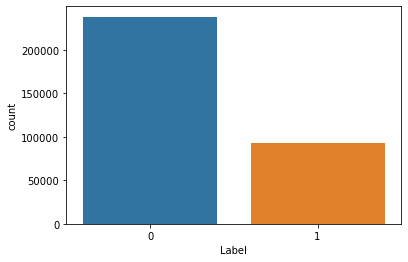

In [37]:
# visualize plotting the detailes of target column
plt.figure()
sns.countplot(data=df, x='Label')
plt.show()

## 2.6 Export the data after cleaning

In [36]:
# export the data in new csv file
df.to_csv('edit_Thursday-01-03-2018.csv')

### 2.7 Convert the dataframe to Numpy array to achieve faster computation

In [46]:
# exclude Timestamp column from the data which we needn't it
df = df.drop(['Timestamp'], axis= 'columns')

array = df.values
X = array[:,0:77] # all columns except label column
Y = array[:,78] # the label column

# 3. Feature Selection

https://www.datacamp.com/tutorial/feature-selection-python

In [48]:
# Chi-Squared

# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

ValueError: Input X must be non-negative.

In [ ]:
# Recursive Feature Elimination 

# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5, step=1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/home/hp/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/hp/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo